In [2]:
import os 
import numpy as np

from ivim_analysis.IVIMAnalysis import IVIMAnalysis
from ivim_analysis.n_patients import NPatients
from ivim_analysis.load_b_example import load_b

# Parameter initialization

In [3]:
patients_info_file = '../data/10patients.txt'
zhaog_path = '/data/users/cyang/acute_pancreatitis/unprocess/ivim'
output_path = "../output/pickles/ivim"

n_analysis = NPatients.readPatientsInfo(patients_info_file, zhaog_path)

bvals, bvecs = load_b()
list_bvals = [bvals]


list_bvals.append(np.insert(bvals, 0, 10))
list_bvals.append(np.insert(bvals, 0, 10))
list_bvals.append(bvals)

list_bvecs = [bvecs]
list_bvecs.append(np.insert(bvecs, 0, bvecs[0], axis=0))
list_bvecs.append(np.insert(bvecs, 0, bvecs[0], axis=0))
list_bvecs.append(bvecs)

# Run analysis

In [4]:
# n_analysis[0].run_analysis(bvals, bvecs, save_ivim_params=True)

In [5]:
n_analysis[0].ivim_params_maps == None

True

In [6]:
# n_analysis[0].ivim_params_maps == IVIMAnalysis.param_maps()

Loading data from pickle file
Data loaded successfully
Run the IVIM model first.


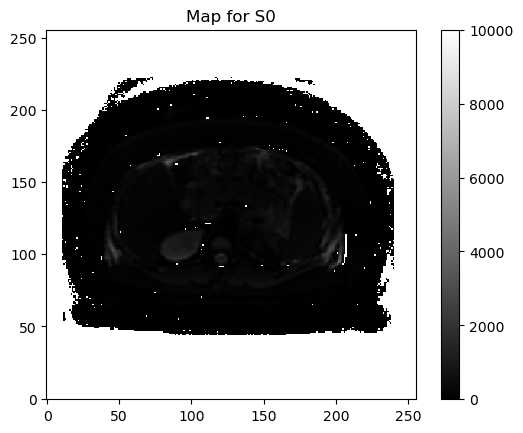

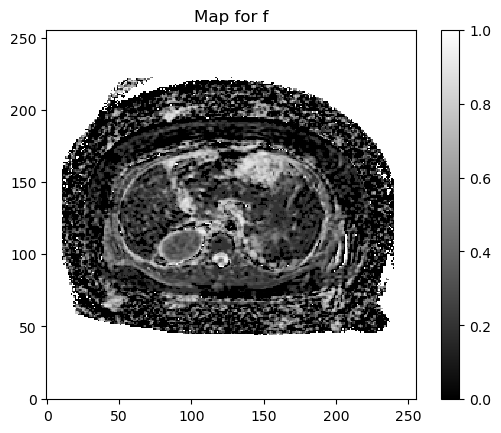

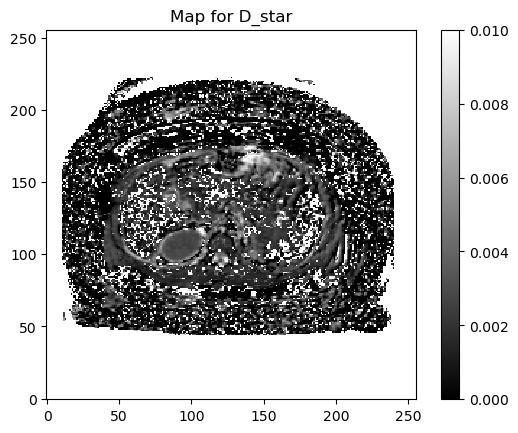

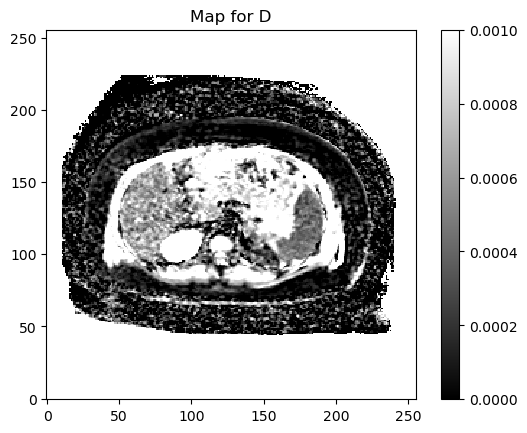

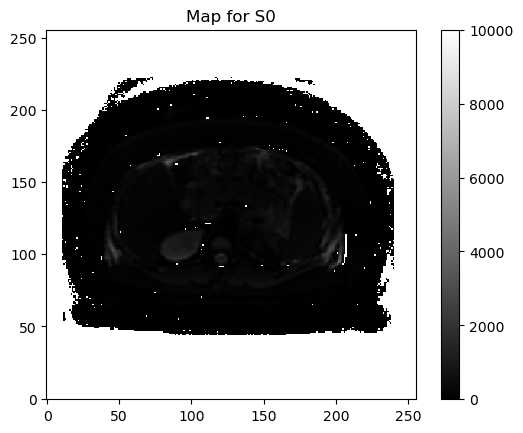

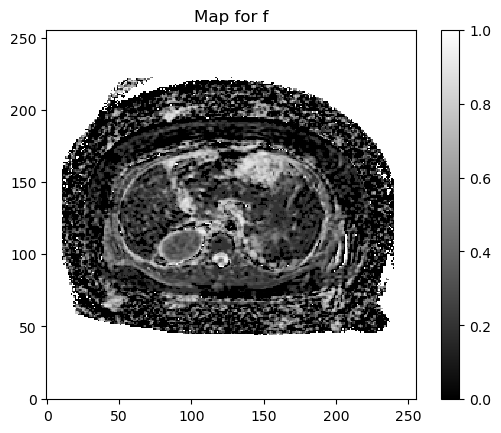

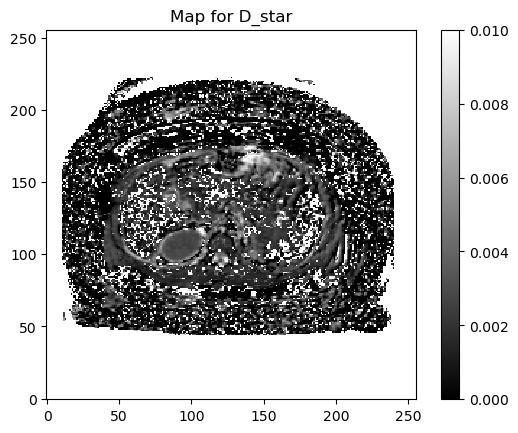

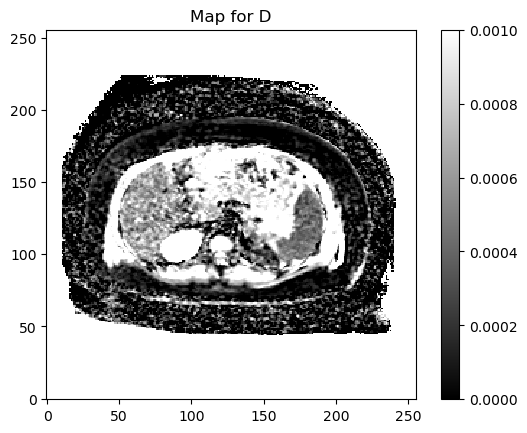

In [7]:
analysis = n_analysis[3]
pickle_ivim_path = os.path.join(output_path, 'ivim_maps'+analysis.patient_id+'.pkl')
analysis.run_analysis(bvals=bvals, bvecs=bvecs, 
                        load_from_pickle=True, 
                        pickle_ivim_path=pickle_ivim_path,
                        save_ivim_params=True)

Loading data from pickle file


Data loaded successfully
Run the IVIM model first.
Loading data from pickle file
Data loaded successfully
Run the IVIM model first.
Loading data from pickle file
Data loaded successfully


/data/users/cyang/acute_pancreatitis/scripts/ivim_analysis/gen_mask.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1)


Run the IVIM model first.
Loading data from pickle file
Data loaded successfully
Run the IVIM model first.


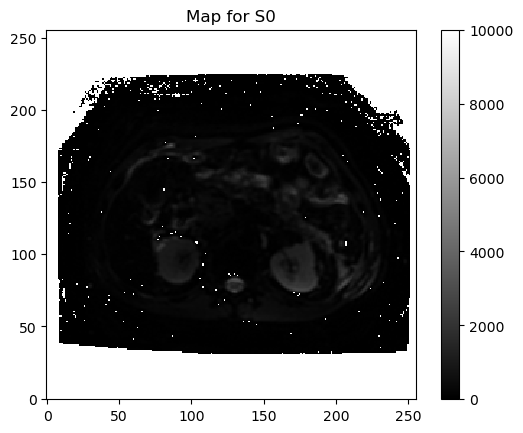

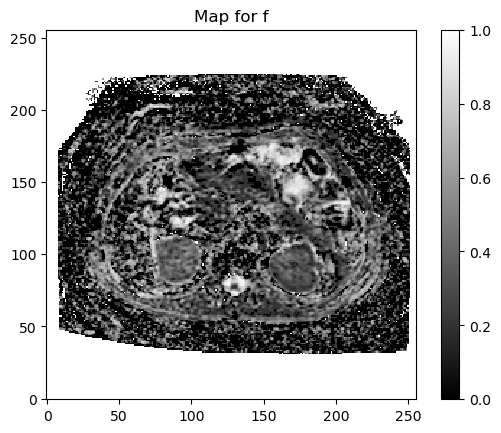

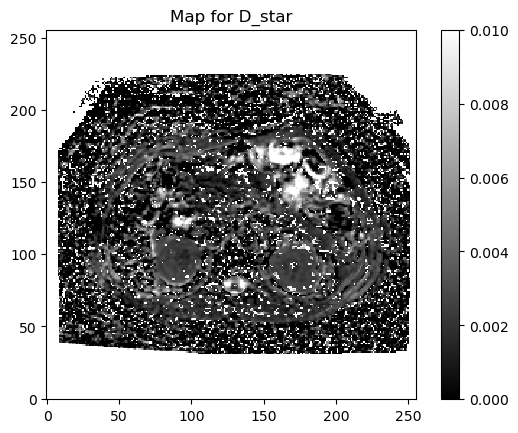

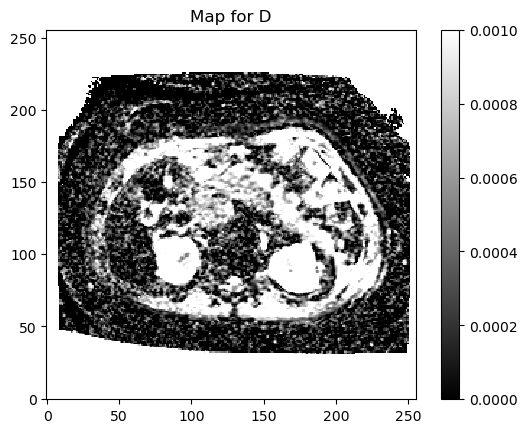

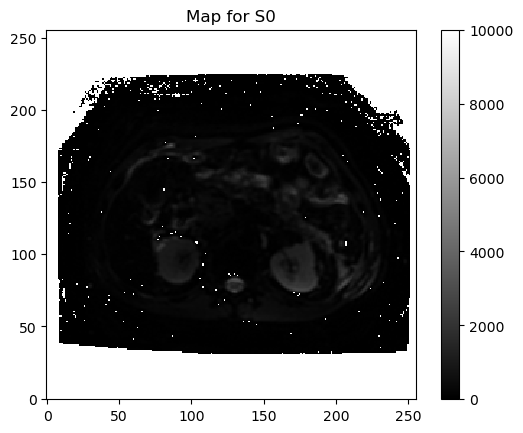

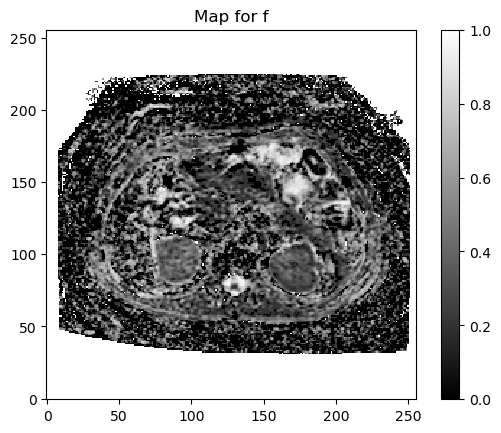

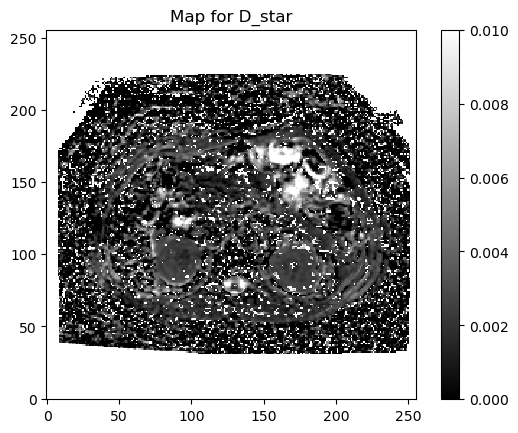

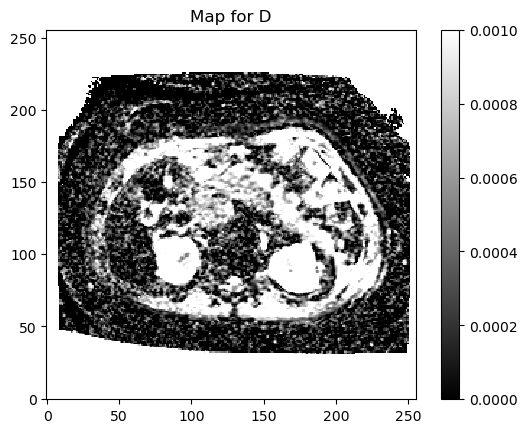

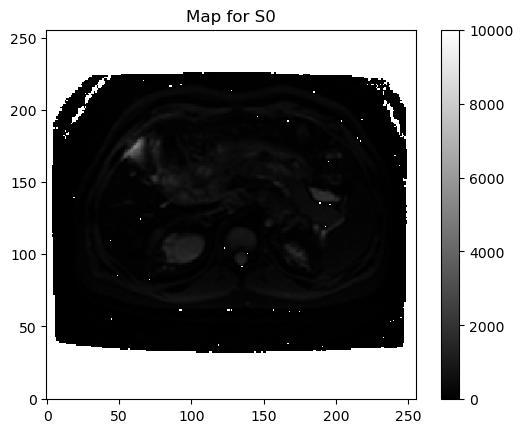

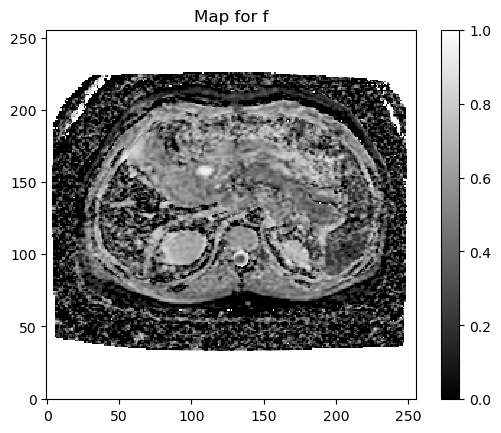

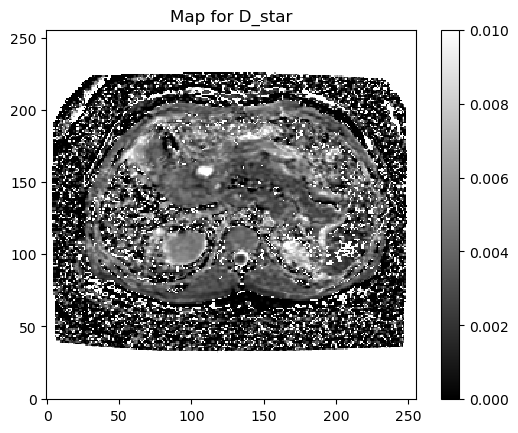

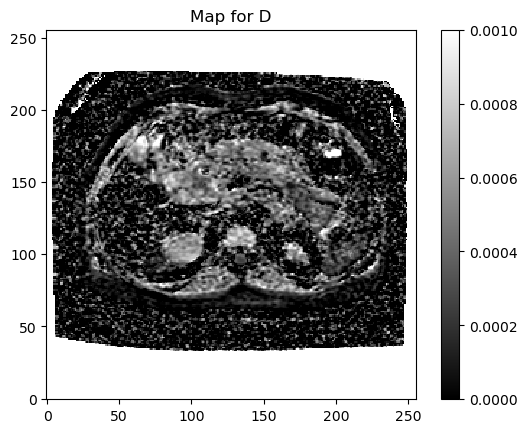

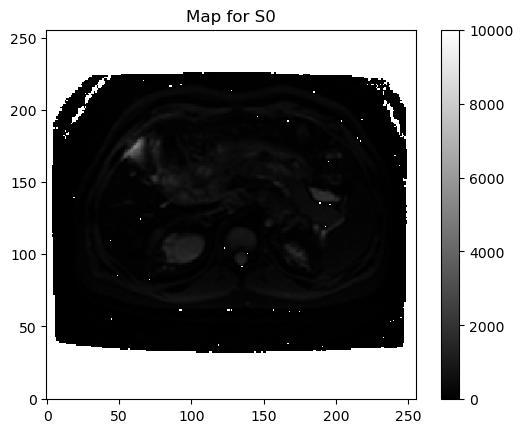

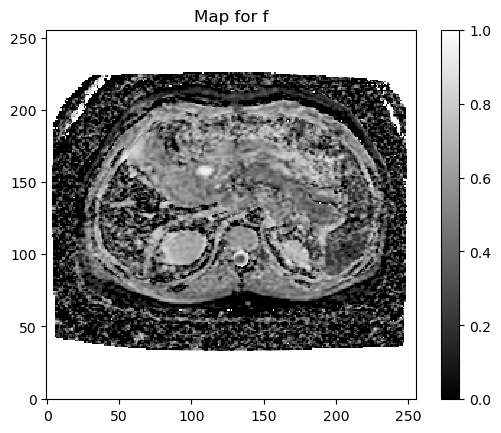

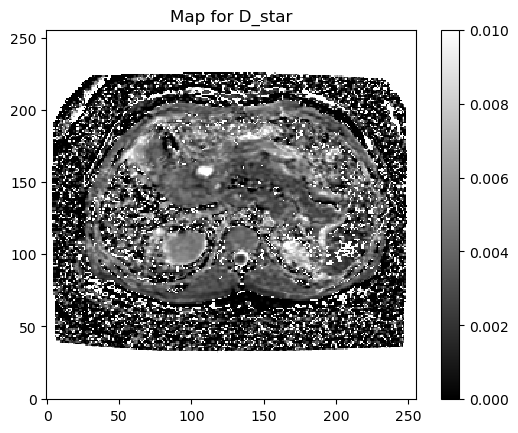

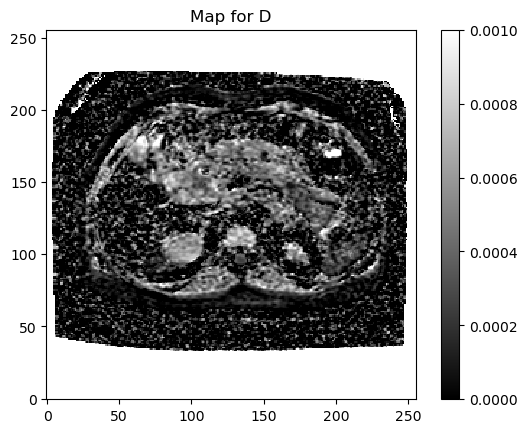

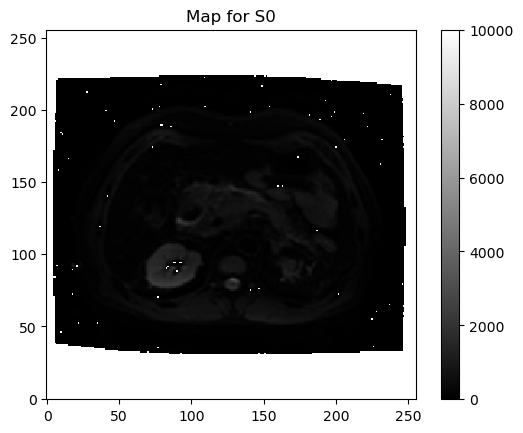

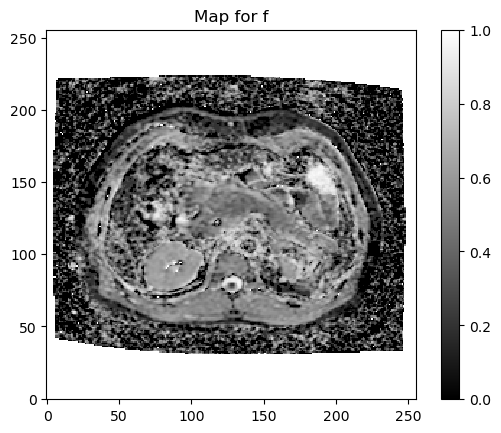

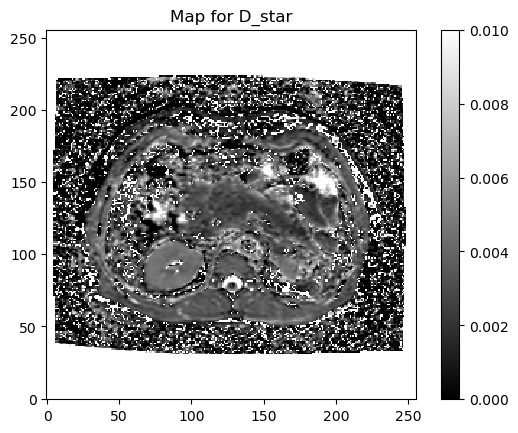

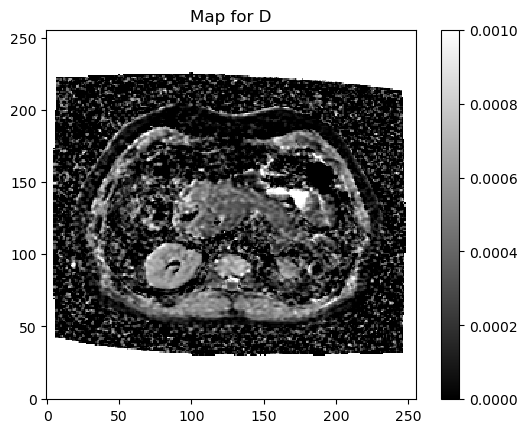

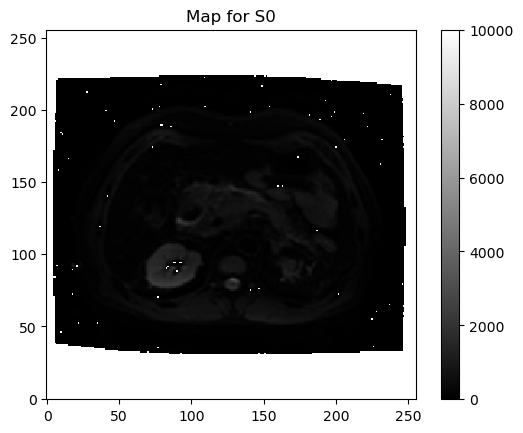

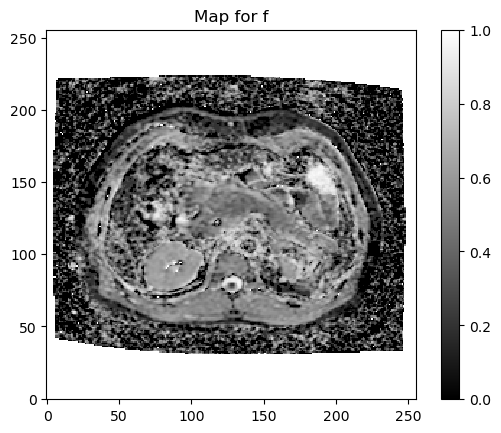

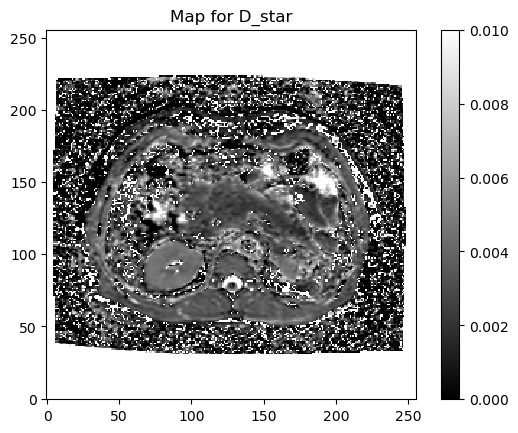

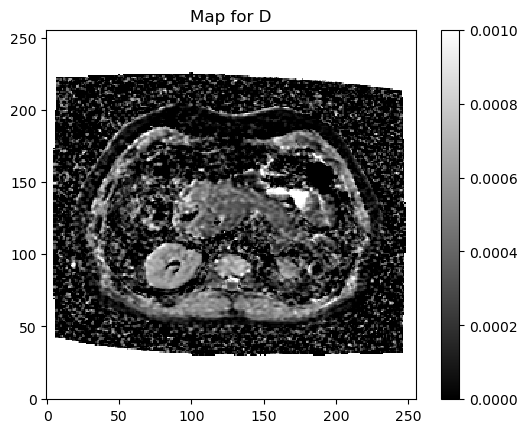

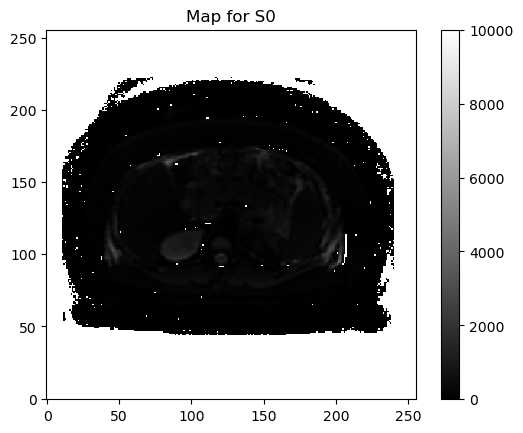

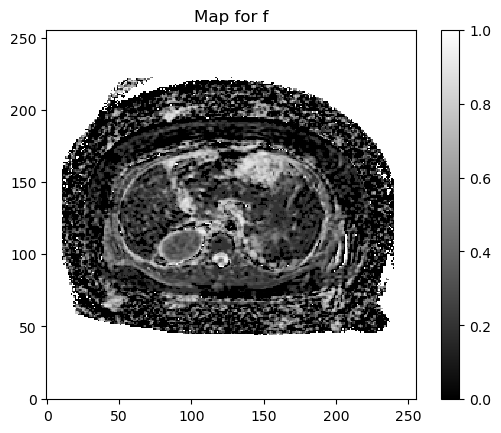

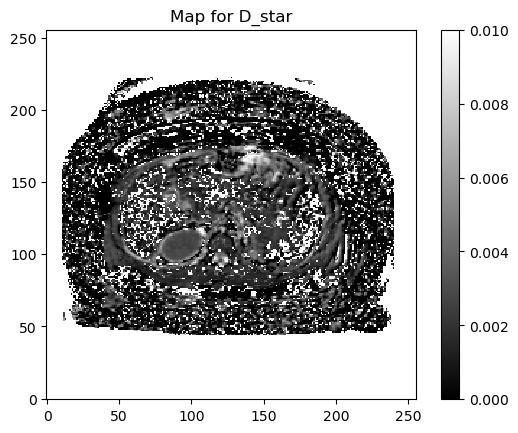

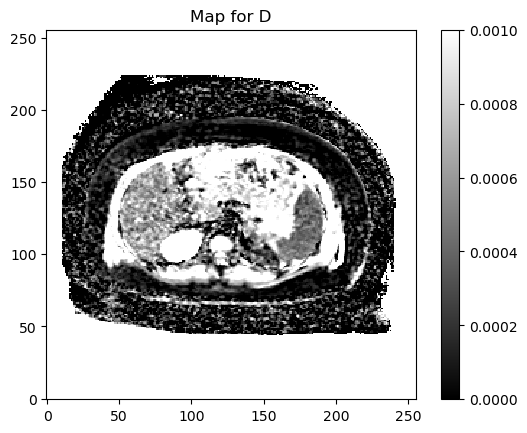

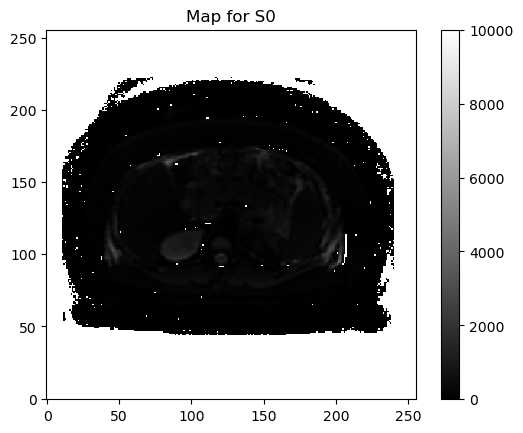

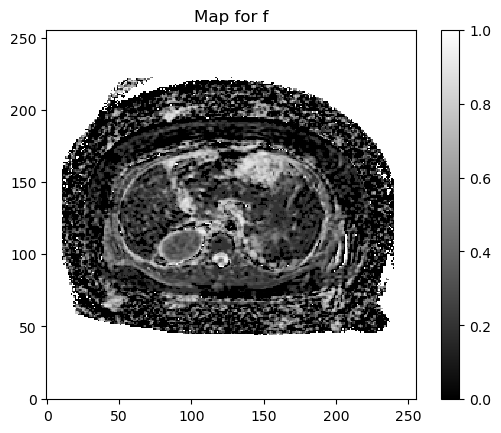

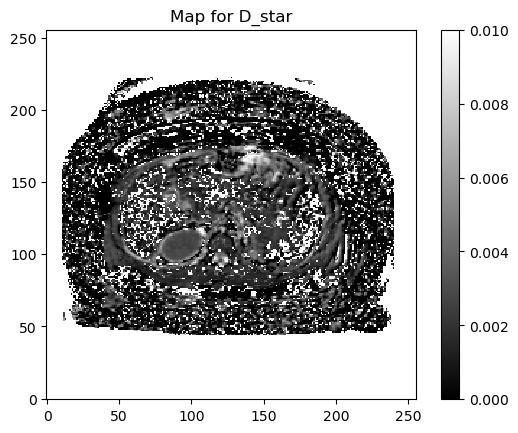

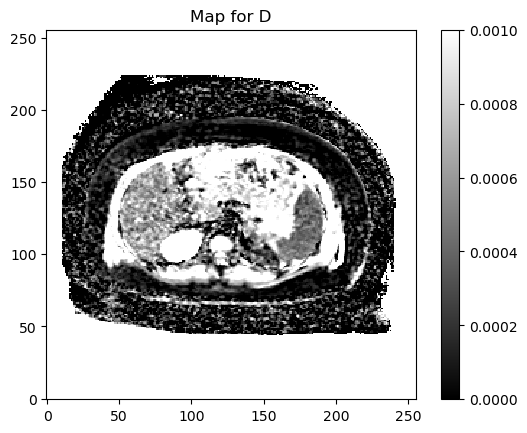

In [8]:
for i, analysis in enumerate(n_analysis):
    pickle_ivim_path = os.path.join(output_path, 'ivim_maps'+analysis.patient_id+'.pkl')
    analysis.run_analysis(bvals=list_bvals[i], bvecs=list_bvecs[i], 
                           load_from_pickle=True, 
                           pickle_ivim_path=pickle_ivim_path,
                           save_ivim_params=True)

# Plot

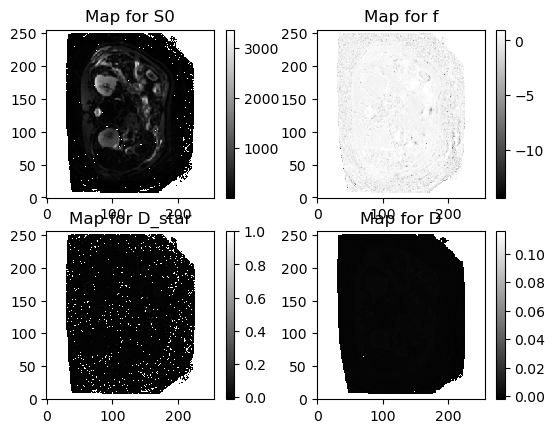

In [47]:
import matplotlib.pyplot as plt

a_dict_ivim_params = n_analysis[0].dict_ivim_params

fig, axes = plt.subplots(2, 2)
axes = axes.flatten()


for i, j in enumerate(n_analysis[0].dict_ivim_params):
    im = n_analysis[0].dict_ivim_params[j]
    cax = axes[i].imshow(
        im,
        origin="lower",
        cmap="gray",
        interpolation="nearest",
    )
    axes[i].set_title("Map for {}".format(j))
    # TODO: Colorbar
    fig.colorbar(cax, ax=axes[i])



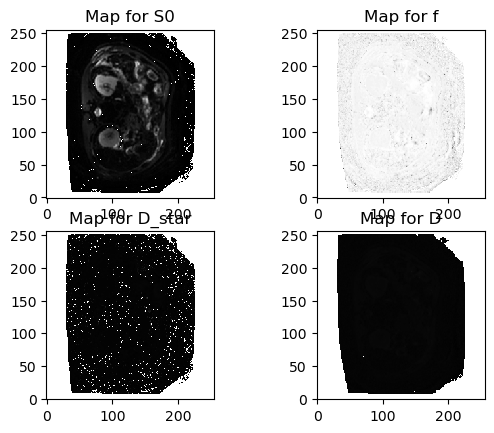

In [40]:
fig

In [46]:
import os
from datetime import date
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# 创建输出目录
output_dir = f"../output/{date.today()}"
os.makedirs(output_dir, exist_ok=True)

# 保存图片
image_path = os.path.join(output_dir, "ivim_params.png")
# plt.savefig(image_path)
fig.savefig(image_path)


# 创建 PowerPoint 演示文稿
prs = Presentation()

# 添加幻灯片
slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
slide = prs.slides.add_slide(slide_layout)

# 添加图片到幻灯片
left = Inches(1)
top = Inches(1)
height = Inches(5.5)
slide.shapes.add_picture(image_path, left, top, height=height)

# 保存 PowerPoint 文件
pptx_path = os.path.join(output_dir, "presentation.pptx")
prs.save(pptx_path)

print(f"PowerPoint 文件已保存到: {pptx_path}")

PowerPoint 文件已保存到: ../output/2024-09-12/presentation.pptx


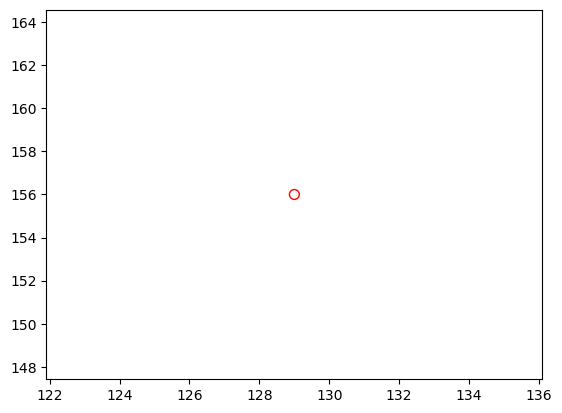

In [9]:
n_analysis[0].plt_circle_roi()

10


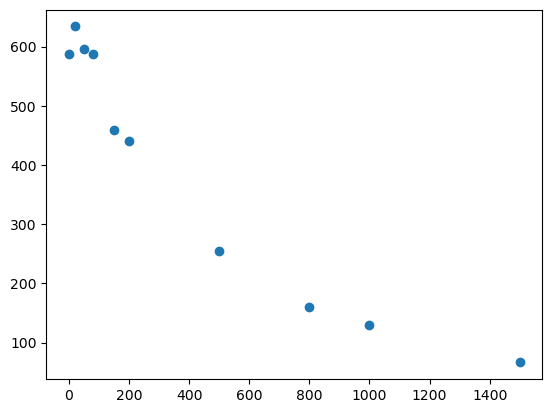

In [10]:
n_analysis[3].plot_b_intensities()

In [11]:
n_analysis[2].img_data

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [12]:
n_analysis[0].dict

AttributeError: 'IVIMAnalysis' object has no attribute 'dict'

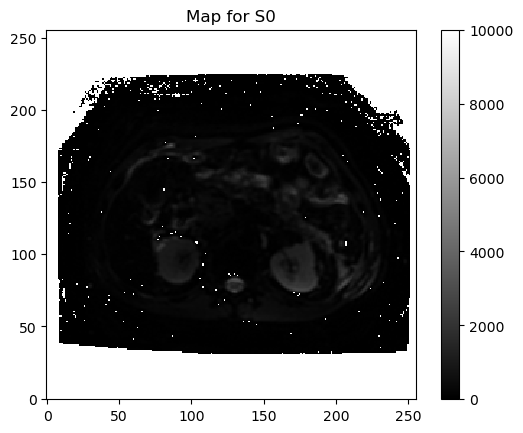

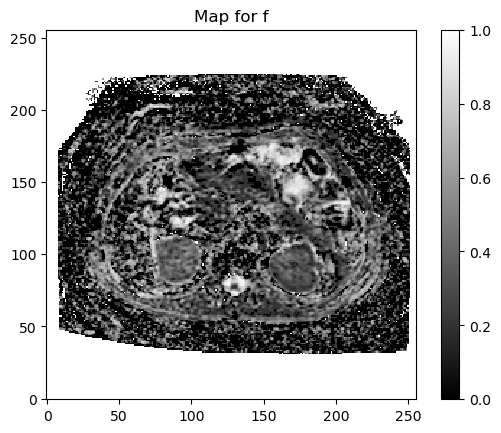

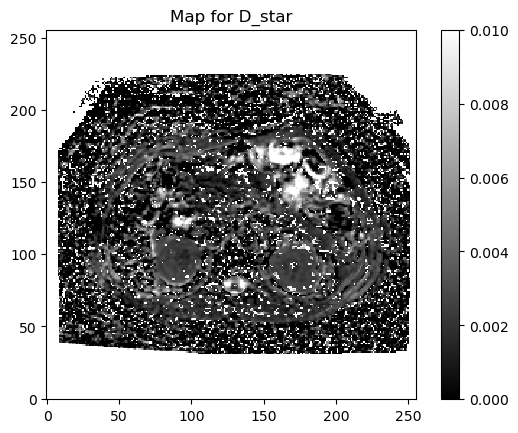

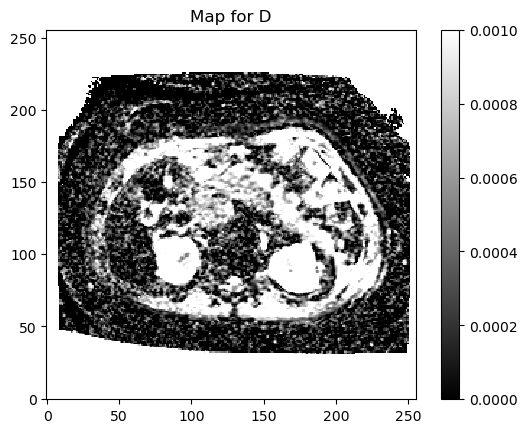

In [12]:
n_analysis[0].plot_maps()

In [13]:
# n_analysis[0].plot_maps_roi()

In [14]:
n_analysis[0].estimated_params_of_roi(True)

Run the IVIM model first.


In [15]:
print(len(n_analysis))
for aa in n_analysis:
    # aa.estimated_params_of_roi()
    print(f"{aa.x_roi:.2f} {aa.y_roi:.2f} {aa.estimated_params_roi} {aa.patient_id}")

4
129.00 156.00 None DongWeilong
129.00 156.00 None LiuBolin
129.00 156.00 None XuJiaheng
129.00 156.00 None ZhangXifeng


In [16]:
aa.estimated_params_roi

In [17]:
# Print dictionary of estimated parameters, with 2 decimal places
# print(n_analysis[0].est

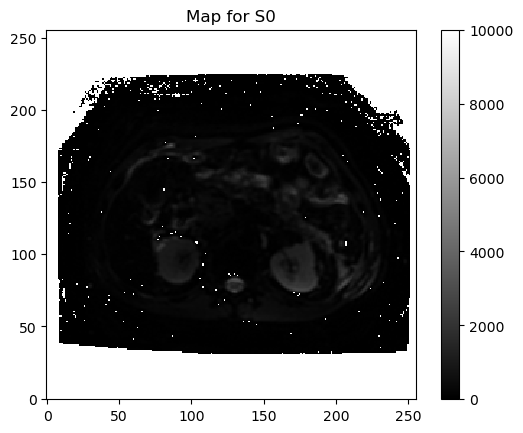

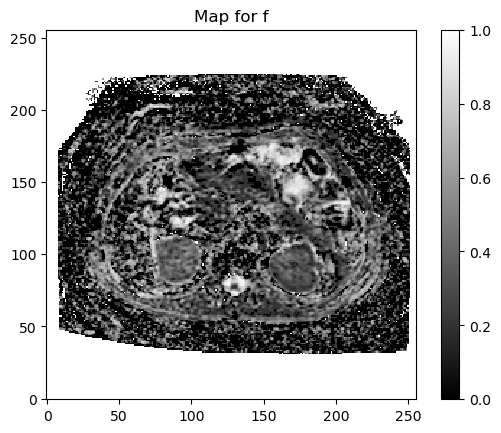

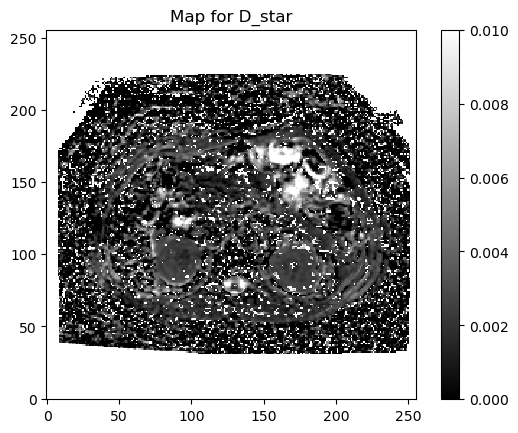

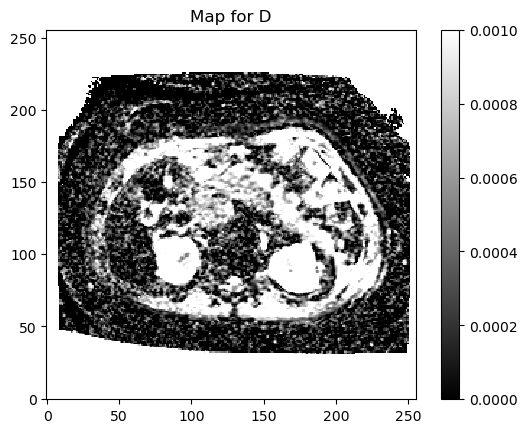

In [18]:
n_analysis[0].plot_maps()

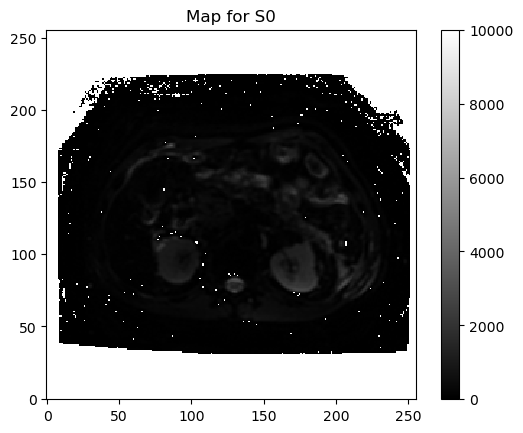

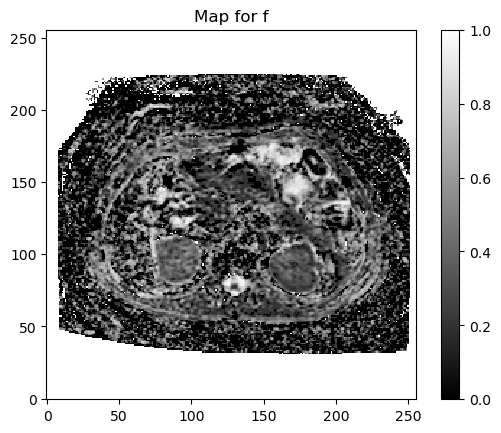

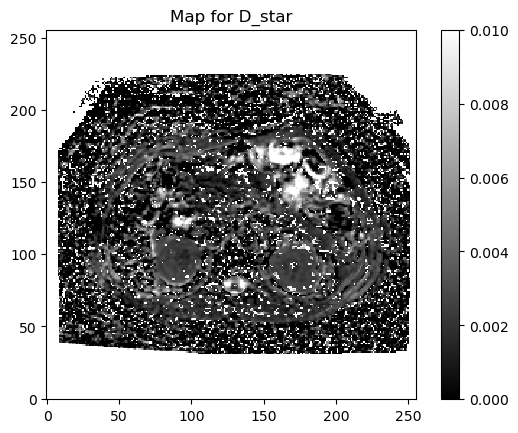

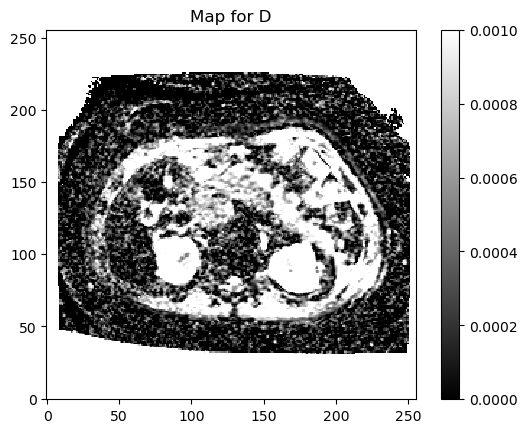

In [19]:
lim = [(0, 10000), (0, 1), (0, 0.01), (0, 0.001)]
for key, value, lim in zip(n_analysis[0].ivim_params_maps.__dict__.keys(), n_analysis[0].ivim_params_maps.__dict__.values(), lim):
    n_analysis[0].plot_map(value, key, lim, key)